# Ex. 3
Please fill-in your ID in the following cell, *No Names!*

Then fill your names in the next two cells.

In [13]:
id1 = "205560782"
id2 = "315810176"


name_student_1 = "Inbar, Tzur"
name_student_1 = "Ronen, Kurman"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame([id1,id2])

# Uncomment in case two students are doing the assignment together
# df = pd.DataFrame([id1])df = pd.DataFrame([id1])
df.to_clipboard(index=False,header=False)

In [15]:
file= 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv'
data= pd.read_csv(file)


q1 - a parameter= the index of the maximum 'views' value so we did the mothod iloc by the a parameter who is 6181 and present the columns.

In [16]:
a=data['views'].idxmax()
data.iloc[[a]][['title','publish_time','views']]


,title,publish_time,views
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06T17:58:51.000Z,149376127


q2- we grouped the data by the 'channel_title' column and used the function max() to get the maximum value of views each channel.
    than we used the sorted_value function, we know this func' sort the values from the smallest to the biggest taht why we used       the tail func'.

In [19]:
grouped_df = data.groupby('channel_title')[['views']].max()
grouped_df.sort_values('views',).tail(3)


,views
channel_title,
Marvel Entertainment,91933007
LuisFonsiVEVO,102012605
YouTube Spotlight,149376127


q3- we made a correlation of this columns by spearmen corr

In [5]:
matrix_corr= data[['comment_count', 'views','dislikes','likes']].corr(method='spearman')
matrix_corr

,comment_count,views,dislikes,likes
comment_count,1.000000,0.840532,0.843331,0.881849
views,0.840532,1.000000,0.866979,0.877789
dislikes,0.843331,0.866979,1.000000,0.801154
likes,0.881849,0.877789,0.801154,1.000000


 q4- we made heatmap by the table from q3

<AxesSubplot:>

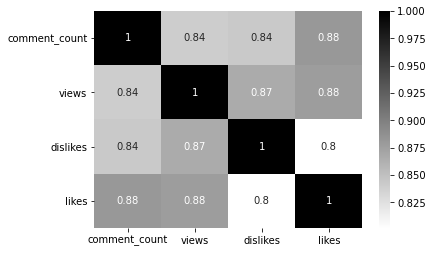

In [6]:
features = ['comment_count', 'views','dislikes','likes']
matrix_corr.corr().round(2)
sns.heatmap(data=matrix_corr,cmap='binary', annot=True)

q5- 

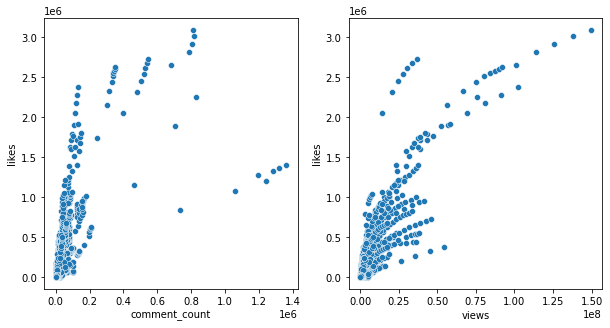

In [22]:
np.fill_diagonal(matrix_corr.values,np.nan)# replace 1 to nan 
maxvlaueindex = matrix_corr.idxmax() #find the rows and the columns with the maximum correlation,(bigest--->smallest)
rowsKeysList = maxvlaueindex.keys()# make list of the keys from the Serie  
fig, axis = plt.subplots(1,2,figsize=(10,5))# make two empty figures.

sns.scatterplot(ax=axis[0], x=rowsKeysList[0],y=maxvlaueindex[0],data=data)
sns.scatterplot(ax=axis[1], x=rowsKeysList[1],y=maxvlaueindex[1],data=data)
plt.show()

# beacuse we know already that the serie sort the keys we called to the two biggest keys [0], [1].

q6

In [25]:
data['publish_year'] = pd.DatetimeIndex(data['publish_time']).year# we oped a new columns named ['publish_year']
allaEnd = data.pivot_table('views',index ='category_id',columns ='publish_year',aggfunc='sum').copy()#we made a new df index by category_id and columns bythe all year from the original df
                                                                                                     # and we used only the views data
allaEnd.groupby("category_id")[[2017,2018]].sum()# we present the data by groupby years 2017-2018 and sum the result of this years.

publish_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
category_id,,,,,,,,,,,
1,200257.0,30858.0,131931.0,279057.0,NaN,21441.0,782848.0,2695783.0,233441.0,8.654615e+08,144072937.0
2,NaN,NaN,NaN,NaN,NaN,13061.0,NaN,19021.0,NaN,7.885352e+07,8047346.0
10,427343.0,158768.0,NaN,NaN,NaN,NaN,9699.0,NaN,NaN,4.504741e+09,839810930.0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4442.0,1.442459e+08,32629265.0
17,NaN,24546.0,194693.0,NaN,NaN,NaN,NaN,NaN,36411.0,3.812432e+08,61660329.0
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.429144e+07,7583452.0
20,NaN,NaN,NaN,255161.0,NaN,NaN,NaN,NaN,NaN,5.035442e+07,84176667.0
22,NaN,NaN,NaN,NaN,174320.0,23442.0,271369.0,35257.0,33260.0,7.018258e+08,67849434.0
23,NaN,NaN,NaN,NaN,156094.0,16910.0,600850.0,NaN,NaN,1.130782e+09,197147385.0
